This notebook is an analysis of the leaked Conti ransomeware group chats. The messages date from 2020 to 2021.
https://github.com/TimAngevare/ContiRansomeware_Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Import and inspect our data

In [4]:
chats = pd.read_csv('chat.csv')
chats.head(20)

,Unnamed: 0,ts,from,to,body,body_en,body_language
0,0,2021-08-23T06:17:46.326321,driver@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
1,1,2021-08-23T06:21:29.401324,driver@q3mcco35auwcstmt.onion,defender@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
2,2,2021-08-23T06:43:20.480030,driver@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
3,3,2021-08-23T06:43:46.773096,hof@q3mcco35auwcstmt.onion,driver@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
4,4,2021-08-23T06:44:22.941040,driver@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
5,5,2021-08-23T06:45:20.386289,hof@q3mcco35auwcstmt.onion,driver@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
6,6,2021-08-23T08:00:32.458165,bentley@q3mcco35auwcstmt.onion,many@q3mcco35auwcstmt.onion,"Привет, бро. Криптанем длл?","Hi, bro. Kriptanem dll?",sr
7,7,2021-08-23T08:49:29.453987,tom@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,[15:37:46] <many@q3mcco35auwcstmt.onion> скинь...,[15:37:46]<many@q3mcco35auwcstmt.onion> throw ...,ru
8,8,2021-08-23T08:49:29.527162,tom@q3mcco35auwcstmt.onion,stern@q3mcco35auwcstmt.onion,),),en
9,9,2021-08-23T09:24:27.533674,mentos@q3mcco35auwcstmt.onion,tunri@q3mcco35auwcstmt.onion,привет,Hey,NaN


Convert date to date and what is our date range?

In [208]:
chats['ts'] = pd.to_datetime(chats['ts'])
print(chats['ts'].min(), 'to', chats['ts'].max())

2021-01-29 00:06:46.929363 to 2022-03-02 18:02:33.731867


How many individuals are there from and to?

In [6]:
chats[['from', 'to']].nunique()

from    274
to      341
dtype: int64

How many unique individuals were chatting?

In [216]:
len(pd.concat([chats['from'], chats['to']]).unique())

345

Let's visualize the frequency of our messages

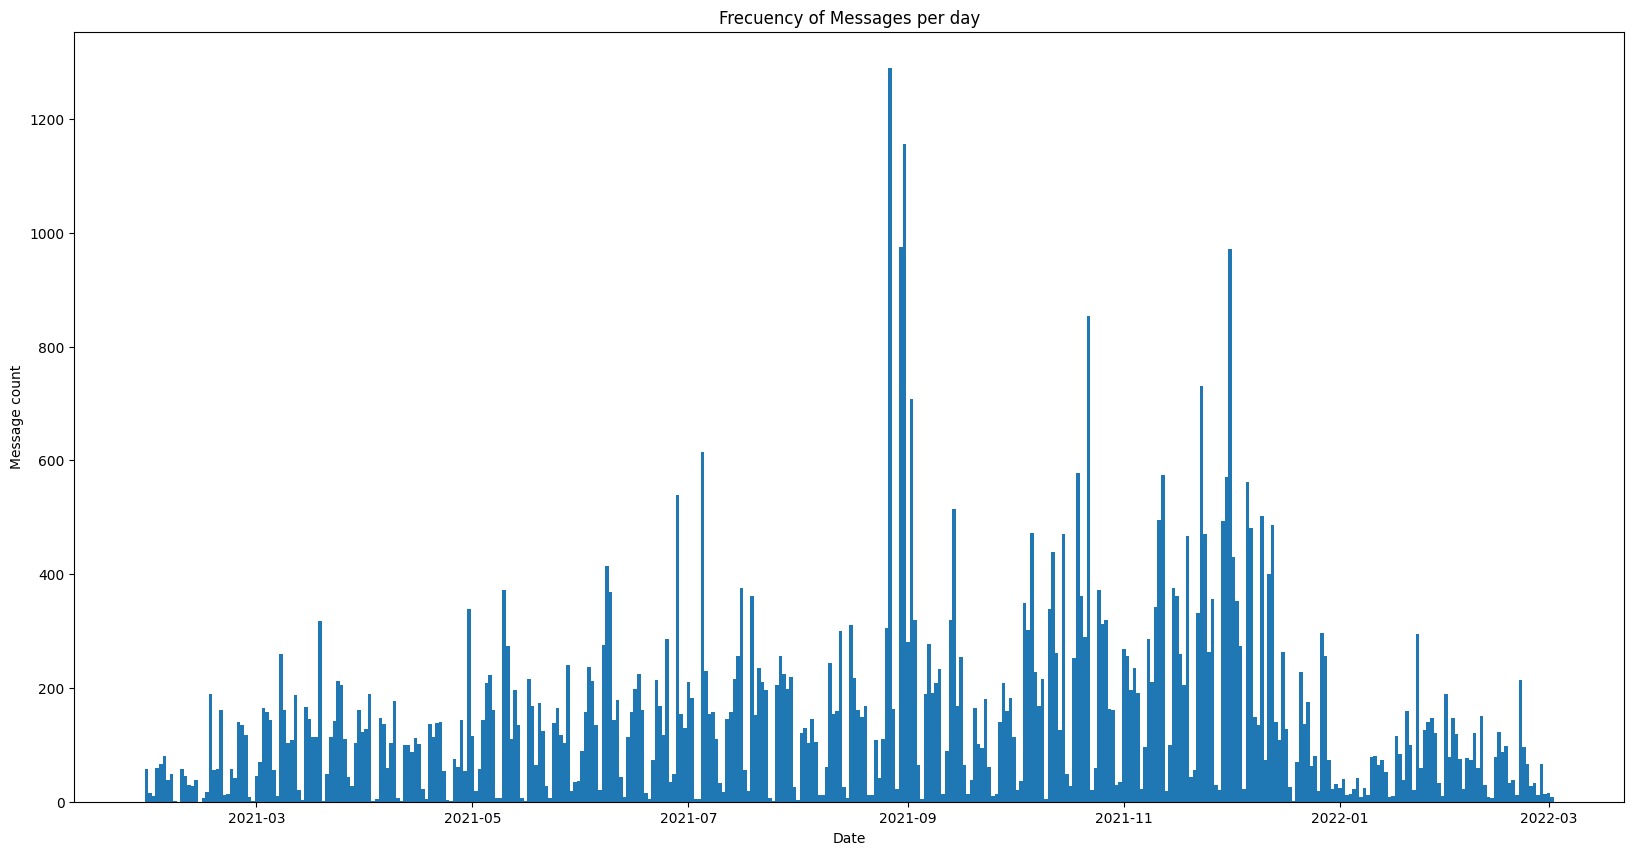

In [207]:
daily_message=chats.groupby(chats['ts'].dt.date).count()
plt.figure(figsize=(20,10))
# plt.plot(daily_message.index, daily_message['ts'], marker='o', linestyle='-')
plt.bar(daily_message.index, daily_message['ts'], width=1)
plt.xlabel("Date")
plt.ylabel("Message count")
plt.title("Frecuency of Messages per day")
plt.show()

Let's analyse the amount of messages per person

Average per person: 221 messages


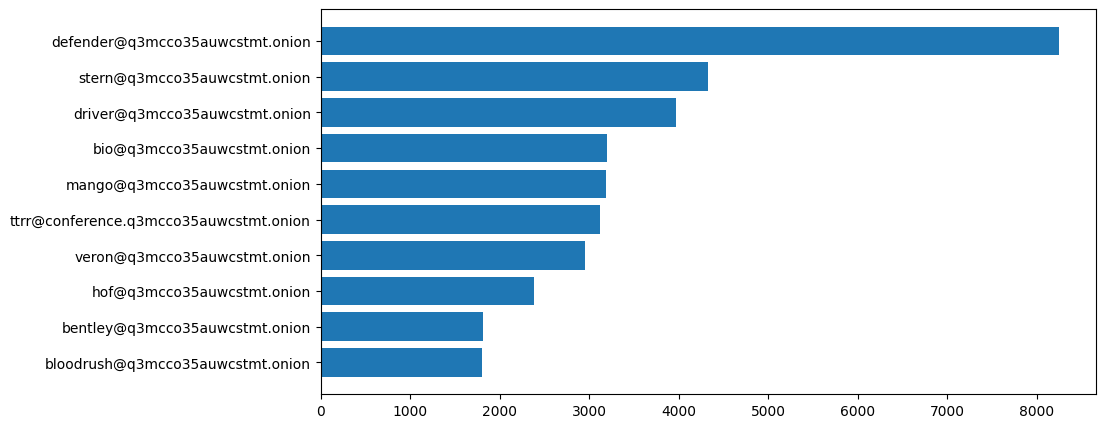

In [40]:
per_person = chats[['from']].value_counts().reset_index()
average = int(per_person['count'].mean())
print('Average per person:', average, 'messages')
top_persons = per_person.head(10).sort_values(by='count')

plt.figure(figsize=(10,5))
plt.barh(top_persons['from'], top_persons['count'])
plt.show()

Let's further investigate these peaks around September 2021.

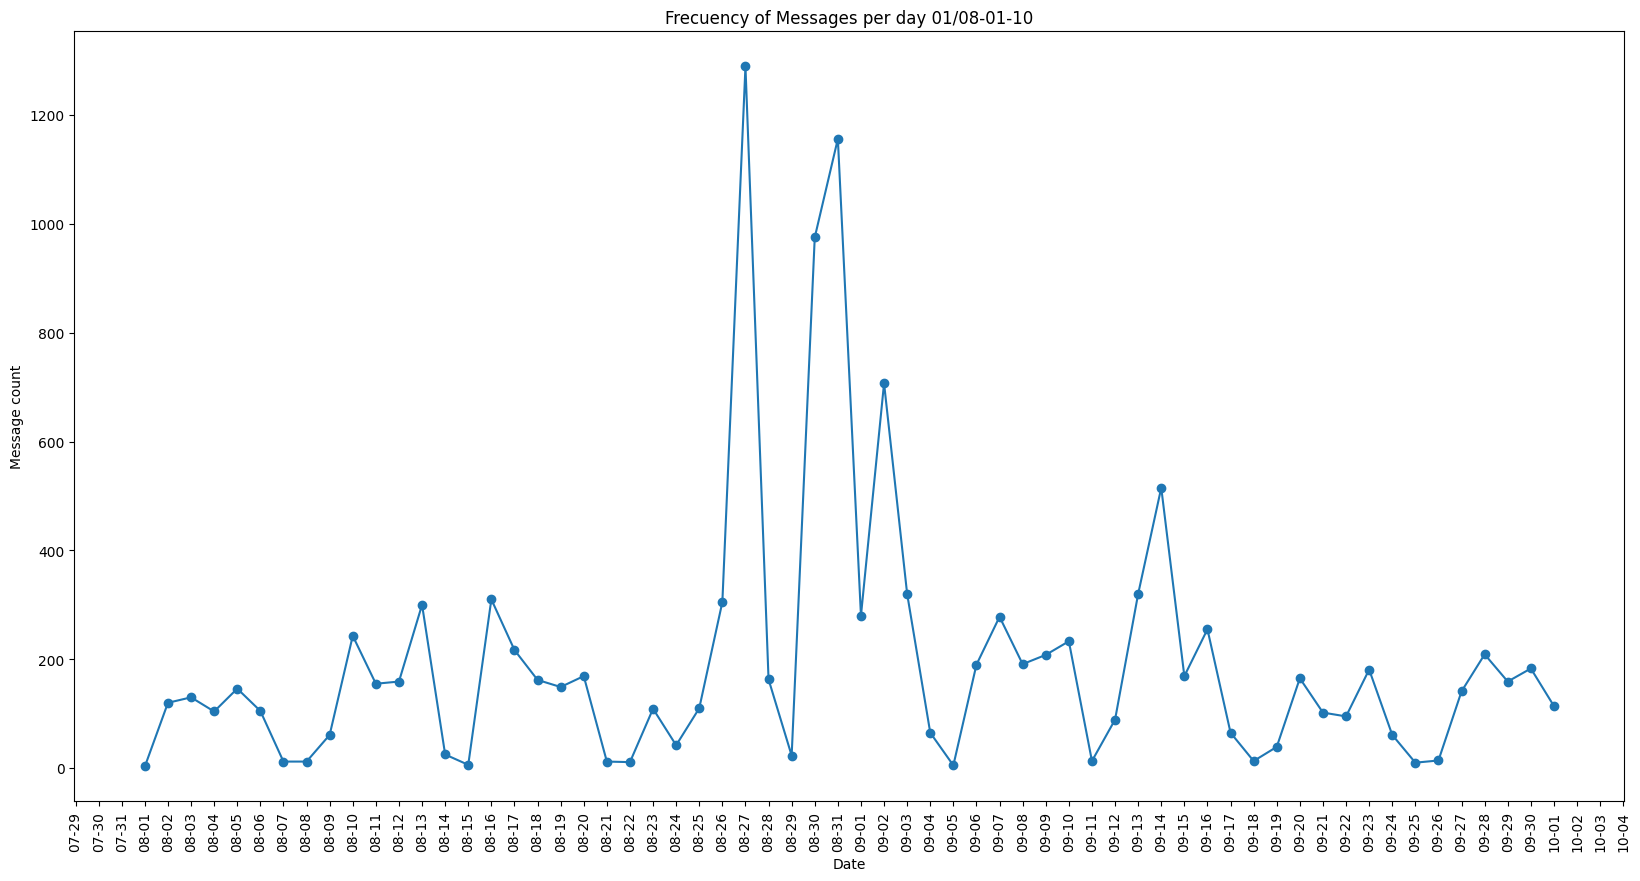

In [11]:
import matplotlib.dates as mdates
start_date = datetime.date(2021,8,1)
end_date = datetime.date(2021,10,1)

filtered_daily_message = daily_message[(daily_message.index >= start_date) & (daily_message.index <= end_date)]
plt.figure(figsize=(20,10))
plt.plot(filtered_daily_message.index, filtered_daily_message['ts'], marker='o', linestyle='-')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set the interval to 1 day
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
plt.xticks(rotation=90)

plt.xlabel("Date")
plt.ylabel("Message count")
plt.title("Frecuency of Messages per day 01/08-01-10")
plt.show()

Let's look at the Linguistics of the messages

In [12]:
messages_peak = chats['body_en']
messages_peak = messages_peak[(messages_peak != '[Error: The message is encrypted and cannot be decrypted.]') & (messages_peak !='[ERROR: This message is encrypted, and you are unable to decrypt it.]')]

In [17]:
import nltk
import string
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Words by frequency

In [19]:
messages_str = ' '.join(messages_peak)
words = nltk.word_tokenize(messages_str)
cleaned_words = [word for word in words if word not in stop_words and word not in string.punctuation]

fd = nltk.FreqDist(cleaned_words)
fd.most_common(20)

[('I', 8650),
 ('39', 5310),
 ('Hey', 2930),
 ('everything', 1801),
 ('https', 1669),
 ('’', 1598),
 ('need', 1426),
 ('write', 1347),
 ('work', 1304),
 ('new', 1256),
 ('already', 1148),
 ('bro', 1123),
 ('Hello', 1105),
 ('1', 1026),
 ('2', 1008),
 ('domain', 994),
 ('server', 986),
 ('like', 973),
 ('hello', 966),
 ('3', 963)]

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...


True

What is the mood of the messages?

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores(messages_str)

{'neg': 0.062, 'neu': 0.82, 'pos': 0.118, 'compound': 1.0}

See if we can find important information in the text

In [22]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pasca\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [23]:
persons = []
organizations = []
gp_entity = []
locations = []
other = []

pos_tagged = nltk.pos_tag(words)
ne_tagged = nltk.ne_chunk(pos_tagged)
for ne in ne_tagged:
    if hasattr(ne, "label"):
        if ne.label() == "PERSON":
            persons.append(ne[0:][0])
        elif ne.label() == "ORGANIZATION":
            organizations.append(ne[0:][0])
        elif ne.label() == "GPE":
            gp_entity.append(ne[0:][0])
        elif ne.label() == "LOCATION":
            locations.append(ne[0:][0])    
        else:
            other.append([ne.label(), ne[0:][0]])

print("persons \n", persons)
print("organizations \n", organizations)
print("Geo political Entity \n", gp_entity)
print("locations \n", locations)
print("other \n", other)

persons 
 [('Kriptanem', 'NNP'), ('Hello', 'NNP'), ('Hello', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Test', 'NNP'), ('Hello', 'NNP'), ('Hello', 'NNP'), ('Hey', 'NNP'), ('Simka', 'NNP'), ('Hello', 'NNP'), ('First', 'NNP'), ('Ready', 'JJ'), ('Trick', 'NNP'), ('Koba', 'NNP'), ('Vlad', 'NNP'), ('Vlad', 'NNP'), ('Hello', 'NNP'), ('Hello', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Готово', 'NNP'), ('Bro', 'NNP'), ('Trick', 'NNP'), ('Troika', 'NNP'), ('Koba', 'NNP'), ('Buildmachine', 'NNP'), ('Hey', 'NNP'), ('Derek', 'NNP'), ('Ef6H', 'NNP'), ('Client', 'NNP'), ('Klaus', 'NNP'), ('Klaus', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Geez', 'NNP'), ('Understood', 'NNP'), ('Too', 'NNP'), ('Hey', 'NNP'), ('Write', 'NNP'), ('Hey', 'NNP'), ('Hey', 'NNP'), ('Buzu', 'NNP'), ('Buterin', 'NNP'), ('Noah', 'NNP'), ('Well', 'NNP'), ('Frantir', 'NN'), ('Swift', 'NNP'), ('Sucks', 'NNP'), ('Hello', 'NNP'), ('Hof', 'NNP'), ('Dowload', 'NNP'), ('Gh

# Analysing message contents

Now let's look for certain things in the messages.

In [201]:
def find_in_messages(columnName, regex, data=chats, extract=False):
    if extract:
        return data[columnName].str.extract(regex).dropna()
    else:
        return data[data[columnName].str.contains(regex, regex=True, case=False)]

## Bitcoin wallets

TODO: analyse top wallets.

In [200]:
find_in_messages('body_en', r'(?:^| )(?P<bitcoin>(?:bc1|[13])[a-zA-HJ-NP-Z0-9]{25,59})(?:$| |.|,)', extract=True).value_counts()

bitcoin                                   
3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ            43
3N4oho2uXfkFBfUAPtoPGLUXjHXqXV4vrJ             7
bc1qkmyv5860pe24h9ytadkzgqltkjuuk9z9s027df     6
1HtyXyCrshiJmLYNru7atpDMJrzG9mzwzf             5
1DSp4woswZECAL9zdmmGeu1s7k1sGExFDh             5
                                              ..
bc1q546cv2zm9vc6mfy47t6ud98m9h058mvd6e6z8a     1
bc1q59g25qrrqnyvcl2jdmxh9y5c0tvnxzk4c4xrl6     1
bc1q5aqs5hrlt3wj5xrnj0craykgsq6h8mse3cftf8     1
bc1q6gj8ymnjh863gmuvh2nc3462trrvzlxf2atzxn     1
bc1qzss3vt428z0kr6pm6sae5wtcxrfgn4edt8eetn     1
Name: count, Length: 224, dtype: int64

## Email addresses

Extract email addresses (without .onion)

In [241]:
find_in_messages('body',r'(?P<address>[\w-]+@(?:[\w\-\.]+)\.(?:(?!onion)[\w-]+))', extract=True).value_counts()

address                         
ttrr@conference.q3mcco35auwcstmt    18
21yelow21@jabb.im                    7
boydjen-it@outlook.com               6
emigrant@xmpp.jp                     4
grave@jabber.hot-chilli.eu           4
                                    ..
armata@exploit.im                    1
ewok555@protonmail.com               1
alexmiller126@outlook.com            1
robootbander@jabb.im                 1
202002739584@alunos.estacio.br       1
Name: count, Length: 106, dtype: int64

## Websites

Extract all URLs

In [238]:
urls = find_in_messages('body', r'(?P<url>https?:\/\/(?P<website>(?:(?:[a-z\d\-A-Z]+(?:\.[a-z\d\-A-Z]+)*)\.)?(?:[a-z\d\-A-Z]+)\.(?:[a-z]{2,}))\/?(?:[\w&=\-.~:/?#\[\]@!$\'()*+,;%]*)?)', extract=True)
urls['url'].value_counts()

url
https://my-ppl.com                                                                                                                        9
https://qaz.im/load/HFsTyy/bDhia9                                                                                                         6
https://www.youtube.com/watch?v=HV7sjEDlMKs                                                                                               6
http://contirec7nchr45rx6ympez5rjldibnqzh7lsa56lvjvaeywhvoj3wad.onion/NJv9nz4fcgefhEIiAcajtSgi4EhLEriHum6l1ZgTB3opPWhRg8KRrJYjxiLdSOrk    5
https://www.youtube.com/watch?v=aPfd6-4F1xU                                                                                               5
                                                                                                                                         ..
https://ojdglzhrquash4igbx6e6wlthe3si4biabcpfopiw33uohvaufjgipad.onion                                                                    1
https://onfager.

List most common domains

In [239]:
urls['website'].value_counts()

website
privnote.com                                                      423
qaz.im                                                            202
privatlab.com                                                     174
www.sendspace.com                                                  34
file.io                                                            31
                                                                 ... 
drive.google.com                                                    1
emploimed.com                                                       1
www.ottenbourg.com                                                  1
ojdglzhrquash4igbx6e6wlthe3si4biabcpfopiw33uohvaufjgipad.onion      1
22q6iu4dmoex3xv5vdiceqzc2bkrc6262cak5ylp3vwauqw3zaxpuyad.onion      1
Name: count, Length: 165, dtype: int64

It is interesting to see that almost all the commonly-used websites are those that provide temporary services such as filesharing, email address and/or notes.

## IP-addresses (IPv4)

In [190]:
find_in_messages('body', r'(?P<IPv4>(?:\d{1,3}\.){3}\d{1,3})', extract=True).value_counts()

IPv4           
179.43.147.243     10
91.193.181.22       7
203.76.105.227      7
188.241.120.42      6
200.58.180.138      5
                   ..
2.56.10.41          1
199.233.235.194     1
198.46.198.9        1
198.46.198.128      1
0.4.3.6             1
Name: count, Length: 136, dtype: int64

## Credit cards

Extract credit card numbers and check if they are valid using the Luhn algorithm

In [202]:
def luhn(card):
    n = len(card)
    s = 0
    is2 = False
    for i in range(n - 1, -1, -1):
        d = ord(card[i]) - ord('0')
        if is2:
            d *= 2
        s += d // 10 + d % 10
        is2 = not is2
    return s % 10 == 0

rex = r"(\d{4})[^\da-zA-Z]*(\d{4})[^\da-zA-Z]*(\d{4})[^\da-zA-Z]*(\d{4})"
cc = pd.Series(c for c in find_in_messages('body', rex, extract=True).agg(''.join, axis=1) if luhn(c))
cc.value_counts()

5345645346567758    15
1410513075163984     6
2299459721632648     2
1648826630163032     2
4847187247511599     2
4890494755979846     1
2437611876451504     1
4276550017637367     1
4890494733526362     1
4890494740805551     1
Name: count, dtype: int64